# Imports

In [32]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

# Sensitivity Analysis

In [17]:
# input data

ebitda2021 = 4678521.0 # in thousands
dl_ebitda = 0.31
shares = 4200000 # in thousands
growth_rate = range(10, 40, 1)
exit_multiple = range(10, 45, 1)
t = 5 # years of forecast

In [53]:
# building the sensitivy matrix

sensitivity = pd.DataFrame(index = exit_multiple, columns = growth_rate)

cotacoes = []


# a coluna zero tem que ser os valores de multiplos de saída
# a linha zero tem que ser os valores de growth

for g in growth_rate:
    
    # convert growth rate to decimal value
    g_dec = g/100.0

    # grow ebitda from 2022 through 2026
    ebitda2026 = ebitda2021*((1+g_dec)**t)


    for m in exit_multiple:

        # use exit multiple to calculate ev
        ev = m*ebitda2026

        # use dl/ebitda to calculate dl
        dl = dl_ebitda*ebitda2026

        # use dl to calculate mkt cap
        mkt_cap = ev-dl

        # use shares to calculate cotacao (mktcap/shares)
        cotacao = round(mkt_cap/shares, 2)

        # store cotacao in the dataframe
        sensitivity.loc[m][g] = cotacao

        cotacoes.append(cotacao)

# print dataframe
sensitivity.rename(str, axis='columns', inplace=True) # change columns name types
sensitivity.columns = sensitivity.columns.map(lambda x: x+'%') # format columns names

sensitivity.index = sensitivity.index.astype('str') # change index name type
sensitivity.index = sensitivity.index.map(lambda x: x+'x') # format index names

#print('X: Crescimento do EBITDA')
#print('Y: Múltiplo EV/EBITDA em 2026')
sensitivity.reset_index(inplace=True)
sensitivity.rename(columns={'index':'ev/ebitda'}, inplace=True)

Média: 93.25 | Mediana: 83.16 | Desvio-padrão: 48.92


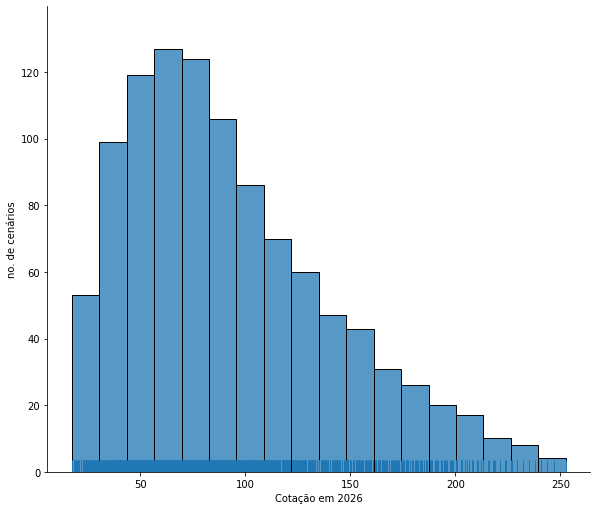

In [62]:
# posso pegar os valores de cotação e plotar numa distribuição
g = sns.displot(cotacoes, rug=True, kind='hist', height=7, aspect=1.2);

g.set_axis_labels("Cotação em 2026", "no. de cenários");
g.set_titles("Distribuição de Targets da WEGE3 em 2026");

print('Média: {} | Mediana: {} | Desvio-padrão: {}'.format(round(np.mean(cotacoes), 2), round(np.median(cotacoes), 2), round(np.std(cotacoes), 2)))